In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('yelp.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [4]:
data = df[['text', 'stars']]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10000 non-null  object
 1   stars   10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


<AxesSubplot:xlabel='stars', ylabel='count'>

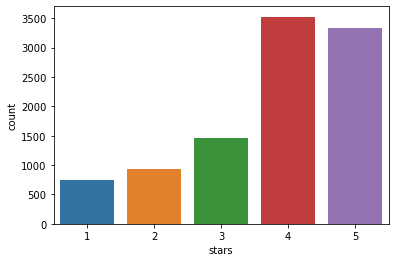

In [6]:
sns.countplot(x=data['stars'])

In [7]:
import string
from nltk.corpus import stopwords

In [8]:
def cleanup(input_str):
    test = [i for i in input_str if i not in string.punctuation]
    test = ''.join(test).split()
    test = [i for i in test if i.lower() not in stopwords.words('english')]
    return ' '.join(test)

In [9]:
cleanup(data.iloc[0]['text'])

'wife took birthday breakfast excellent weather perfect made sitting outside overlooking grounds absolute pleasure waitress excellent food arrived quickly semibusy Saturday morning looked like place fills pretty quickly earlier get better favor get Bloody Mary phenomenal simply best Ive ever Im pretty sure use ingredients garden blend fresh order amazing EVERYTHING menu looks excellent white truffle scrambled eggs vegetable skillet tasty delicious came 2 pieces griddled bread amazing absolutely made meal complete best toast Ive ever Anyway cant wait go back'

In [10]:
data['text'] = data['text'].apply(cleanup)

/Users/limjunze/opt/anaconda3/envs/tfdeeplearning/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
X = data['text']
y = data['stars']

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
from sklearn.feature_extraction.text import CountVectorizer

In [99]:
cv = CountVectorizer()
X = cv.fit_transform(X)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [101]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB

In [102]:
nb = OneVsRestClassifier(MultinomialNB())

In [103]:
nb.fit(X_train, y_train)

OneVsRestClassifier(estimator=MultinomialNB())

In [104]:
pred = nb.predict(X_test)

In [105]:
from sklearn.metrics import confusion_matrix, classification_report

In [106]:
confusion_matrix(y_test, pred)

array([[ 42,  20,   9,  35,  16],
       [ 19,  18,  20,  95,  29],
       [  3,  10,  29, 235,  48],
       [  4,   2,  25, 471, 207],
       [  0,   2,   8, 273, 380]])

In [107]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.62      0.34      0.44       122
           2       0.35      0.10      0.15       181
           3       0.32      0.09      0.14       325
           4       0.42      0.66      0.52       709
           5       0.56      0.57      0.57       663

    accuracy                           0.47      2000
   macro avg       0.45      0.35      0.36      2000
weighted avg       0.46      0.47      0.43      2000



In [23]:
# test only with 1 and 5

In [51]:
X = data[(data['stars'] == 1) | (data['stars'] == 5)]['text']
y = data[(data['stars'] == 1) | (data['stars'] == 5)]['stars']

In [52]:
cv = CountVectorizer()
X = cv.fit_transform(X)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [54]:
nb = MultinomialNB()

In [55]:
nb.fit(X_train, y_train)

MultinomialNB()

In [56]:
pred = nb.predict(X_test)

In [57]:
confusion_matrix(y_test, pred)

array([[119,  34],
       [ 18, 647]])

In [58]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.87      0.78      0.82       153
           5       0.95      0.97      0.96       665

    accuracy                           0.94       818
   macro avg       0.91      0.88      0.89       818
weighted avg       0.93      0.94      0.94       818



<AxesSubplot:>

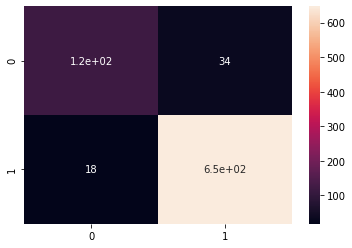

In [59]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True)